# Image IPP coding

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

--2021-04-08 17:30:33--  https://media.xiph.org/video/derf/y4m/bus_cif.y4m
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving media.xiph.org (media.xiph.org)... 2607:5300:203:2965::, 54.39.18.101
Connecting to media.xiph.org (media.xiph.org)|2607:5300:203:2965::|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22810538 (22M) [application/octet-stream]
Saving to: ‘bus_cif.y4m’

bus_cif.y4m         100%[===================>]  21,75M  2,94MB/s    in 7,9s    

2021-04-08 17:30:42 (2,76 MB/s) - ‘bus_cif.y4m’ saved [22810538/22810538]

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libf

## Without I-type blocks

In [66]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [67]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP
#import MP4 as IPP


In [68]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4415982744107744 KBPS: 4029.072 Average AMSE: 49.7563548900463
     2	Q_step: 22 BPP: 0.4006155303030303 KBPS: 3655.152 Average AMSE: 57.38056487180835
     3	Q_step: 23 BPP: 0.36308396464646464 KBPS: 3312.72 Average AMSE: 66.60168569374301
     4	Q_step: 24 BPP: 0.3277172769360269 KBPS: 2990.04 Average AMSE: 77.0008304617354
     5	Q_step: 25 BPP: 0.2943927118406285 KBPS: 2685.992 Average AMSE: 90.49760101010104
     6	Q_step: 26 BPP: 0.26485514870931537 KBPS: 2416.496 Average AMSE: 106.05246869739057
     7	Q_step: 27 BPP: 0.23674856200897867 KBPS: 2160.056 Average AMSE: 124.58244346678589
     8	Q_step: 28 BPP: 0.21149252946127947 KBPS: 1929.624 Average AMSE: 146.76258253103956
     9	Q_step: 29 BPP: 0.18781477974186309 KBPS: 1713.592 Average AMSE: 172.4633477790053
    10	Q_step: 30 BPP: 0.1661765221661055 KBPS: 1516.168 Average AMSE: 203.39484493371216
    11	Q_step: 31 BPP: 0.14720994668911336 KBPS: 1343.12 Average AMSE: 238.66845297593997
    12	Q_step: 

In [69]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [70]:
!cat /tmp/curve_no_intrablocks.txt

0.4415982744107744	49.7563548900463
0.4006155303030303	57.38056487180835
0.36308396464646464	66.60168569374301
0.3277172769360269	77.0008304617354
0.2943927118406285	90.49760101010104
0.26485514870931537	106.05246869739057
0.23674856200897867	124.58244346678589
0.21149252946127947	146.76258253103956
0.18781477974186309	172.4633477790053
0.1661765221661055	203.39484493371216
0.14720994668911336	238.66845297593997
0.12917543490460157	280.27864605253933
0.11386609147025814	324.48683054503374
0.10094346240179573	372.00364123000844
0.08930713383838383	425.68165180450336
0.07825126262626263	483.44873967539985
0.06963646885521886	537.5542773656705
0.06191077441077441	595.0101701695777
0.056442901234567903	650.7225844600521
0.05096976711560045	716.2003593881524
0.0471047278338945	775.0849406609497


In [71]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [72]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as IPP\n/\n#import MP4 as IPP\n/g' RD_curve.py

In [73]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP
#import MP4 as IPP


In [74]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.4212612233445567 KBPS: 3843.52 Average AMSE: 40.84510096625981
     2	Q_step: 22 BPP: 0.382215382996633 KBPS: 3487.272 Average AMSE: 47.55179990004209
     3	Q_step: 23 BPP: 0.34606043069584735 KBPS: 3157.4 Average AMSE: 55.20095058659511
     4	Q_step: 24 BPP: 0.3133207070707071 KBPS: 2858.6879999999996 Average AMSE: 63.92290789842875
     5	Q_step: 25 BPP: 0.2815375982042648 KBPS: 2568.7039999999997 Average AMSE: 74.84315014292228
     6	Q_step: 26 BPP: 0.25293735970819303 KBPS: 2307.76 Average AMSE: 87.97491944181397
     7	Q_step: 27 BPP: 0.22736654741863074 KBPS: 2074.456 Average AMSE: 102.39967458876964
     8	Q_step: 28 BPP: 0.20389134399551065 KBPS: 1860.272 Average AMSE: 120.09376841329964
     9	Q_step: 29 BPP: 0.1831632295173962 KBPS: 1671.152 Average AMSE: 140.37393992003368
    10	Q_step: 30 BPP: 0.16324968434343434 KBPS: 1489.464 Average AMSE: 163.74022253787874
    11	Q_step: 31 BPP: 0.1464453563411897 KBPS: 1336.144 Average AMSE: 190.59326884294

In [75]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [76]:
!cat /tmp/curve_with_intrablocks.txt

0.4212612233445567	40.84510096625981
0.382215382996633	47.55179990004209
0.34606043069584735	55.20095058659511
0.3133207070707071	63.92290789842875
0.2815375982042648	74.84315014292228
0.25293735970819303	87.97491944181397
0.22736654741863074	102.39967458876964
0.20389134399551065	120.09376841329964
0.1831632295173962	140.37393992003368
0.16324968434343434	163.74022253787874
0.1464453563411897	190.59326884294333
0.13124736952861954	222.0218300627806
0.11825810185185184	256.2812246817129
0.10741003787878789	296.4588974598415
0.09746071829405163	337.092570123983
0.0874351150392817	382.0921660178171
0.07916491301907969	428.2882572469486
0.0726466049382716	474.13923424786054
0.06699021464646464	526.9521364907757
0.06245089786756454	577.1087740468924
0.05818515011223345	639.831924825512


In [77]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

## MP4

In [15]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as IPP\n/\nimport MP4 as IPP\n/g' RD_curve.py

In [16]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
#import image_IPP_adaptive as IPP
import MP4 as IPP


In [17]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --enable-nvenc --enabl

[libx264 @ 0x559dc14f6240] using SAR=128/117
[libx264 @ 0x559dc14f6240] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x559dc14f6240] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x559dc14f6240] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=30 keyint_min=3 scenecut=40 intra_refresh=0 rc_lookahead=30 rc=crf mbtree=1 crf=22.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv4

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=7.57x    
video:6572kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=     105kB time=00:00:01.16 bitrate= 739.6kbits/s speed=6.02x    
video:104kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.907004%
[libx264 @ 0x56329203d240] frame I:1     Avg QP:29.98  size: 13991
[libx264 @ 0x56329203d240] frame P:29    Avg QP:30.22  size:  3161
[libx264 @ 0x56329203d240] mb I  I16..4:  2.0% 61.1% 36.9%
[libx264 @ 0x56329203d240] mb P  I16..4:  0.2%  0.5%  0.4%  P16..4: 40.6% 26.7% 18.7%  0.0%  0.0%    skip:13.0%
[libx264 @ 0x56329203d240] 8x8 transform intra:57.6% inter:55.3%
[libx264 @ 0x56329203d240] coded y,u,v intra: 89.2% 36.2% 26.6% inter: 35.2% 3.8% 2.3%
[libx264 @ 0x56329203d240] i16 v,h,dc,p: 33% 56%  4%  7%
[libx264 @ 0x56329203d240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 22% 19% 21%  4%  6%  6%  7%  6% 10%
[libx264 @ 0x56329203d240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 28% 30% 12%  4%  6%  5%  5%  5%  5%
[libx264 @ 0x56329203d240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x56329203d240] ref P L0: 67

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=7.63x    
video:6402kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=      69kB time=00:00:01.16 bitrate= 487.5kbits/s speed=6.63x    
video:68kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.382614%
[libx264 @ 0x5607f5ed1240] frame I:1     Avg QP:32.98  size: 10312
[libx264 @ 0x5607f5ed1240] frame P:29    Avg QP:33.28  size:  2027
[libx264 @ 0x5607f5ed1240] mb I  I16..4:  2.3% 64.9% 32.8%
[libx264 @ 0x5607f5ed1240] mb P  I16..4:  0.2%  0.4%  0.3%  P16..4: 40.8% 21.8% 12.8%  0.0%  0.0%    skip:23.7%
[libx264 @ 0x5607f5ed1240] 8x8 transform intra:60.5% inter:59.1%
[libx264 @ 0x5607f5ed1240] coded y,u,v intra: 84.3% 27.4% 22.2% inter: 23.2% 2.5% 1.7%
[libx264 @ 0x5607f5ed1240] i16 v,h,dc,p: 24% 69%  0%  7%
[libx264 @ 0x5607f5ed1240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 19% 20% 23%  5%  6%  6%  7%  6%  8%
[libx264 @ 0x5607f5ed1240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 29% 32% 12%  4%  6%  4%  5%  4%  4%
[libx264 @ 0x5607f5ed1240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x5607f5ed1240] ref P L0: 70.

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=7.66x    
video:6230kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:12.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x5641af51f240] using SAR=128/117
[libx264 @ 0x5641af51f240] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x5641af51f240] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x5641af51f240] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=

frame=   30 fps=0.0 q=-1.0 Lsize=      41kB time=00:00:01.16 bitrate= 288.1kbits/s speed=7.51x    
video:40kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 2.362108%
[libx264 @ 0x557652da2240] frame I:1     Avg QP:36.96  size:  6332
[libx264 @ 0x557652da2240] frame P:29    Avg QP:37.38  size:  1167
[libx264 @ 0x557652da2240] mb I  I16..4:  5.3% 70.2% 24.5%
[libx264 @ 0x557652da2240] mb P  I16..4:  0.3%  0.4%  0.4%  P16..4: 40.2% 13.6%  7.0%  0.0%  0.0%    skip:38.0%
[libx264 @ 0x557652da2240] 8x8 transform intra:62.1% inter:68.8%
[libx264 @ 0x557652da2240] coded y,u,v intra: 71.9% 20.9% 17.6% inter: 13.8% 1.7% 1.2%
[libx264 @ 0x557652da2240] i16 v,h,dc,p: 32% 54%  8%  5%
[libx264 @ 0x557652da2240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 21% 22% 23%  5%  5%  5%  6%  5%  9%
[libx264 @ 0x557652da2240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 37% 24% 17%  3%  4%  5%  4%  3%  3%
[libx264 @ 0x557652da2240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x557652da2240] ref P L0: 72.

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.12x    
video:5918kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

frame=   30 fps=0.0 q=-1.0 Lsize=      28kB time=00:00:01.16 bitrate= 197.3kbits/s speed=8.31x    
video:27kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.491317%
[libx264 @ 0x55d383234240] frame I:1     Avg QP:39.99  size:  4141
[libx264 @ 0x55d383234240] frame P:29    Avg QP:40.54  size:   789
[libx264 @ 0x55d383234240] mb I  I16..4: 10.6% 65.4% 24.0%
[libx264 @ 0x55d383234240] mb P  I16..4:  0.3%  0.7%  0.2%  P16..4: 38.5%  9.1%  3.6%  0.0%  0.0%    skip:47.6%
[libx264 @ 0x55d383234240] 8x8 transform intra:62.6% inter:76.2%
[libx264 @ 0x55d383234240] coded y,u,v intra: 61.3% 14.8% 14.7% inter: 8.9% 1.2% 1.0%
[libx264 @ 0x55d383234240] i16 v,h,dc,p: 19% 62%  8% 12%
[libx264 @ 0x55d383234240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 23% 18% 30%  4%  5%  5%  4%  5%  6%
[libx264 @ 0x55d383234240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 34% 24% 16%  4%  6%  4%  6%  3%  4%
[libx264 @ 0x55d383234240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55d383234240] ref P L0: 77.0

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.24x    
video:5544kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:12.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x564a5a5d9240] using SAR=128/117
[libx264 @ 0x564a5a5d9240] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x564a5a5d9240] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x564a5a5d9240] 264 - core 160 r3011 cde9a93 - H.264/MPEG-4 AVC codec - Copyleft 2003-2020 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=

frame=   30 fps=0.0 q=-1.0 Lsize=      18kB time=00:00:01.16 bitrate= 124.1kbits/s speed= 8.5x    
video:17kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 5.667802%
[libx264 @ 0x555dcec9e240] frame I:1     Avg QP:44.00  size:  2323
[libx264 @ 0x555dcec9e240] frame P:29    Avg QP:44.77  size:   485
[libx264 @ 0x555dcec9e240] mb I  I16..4: 16.7% 76.0%  7.3%
[libx264 @ 0x555dcec9e240] mb P  I16..4:  0.6%  0.7%  0.0%  P16..4: 34.6%  4.1%  2.0%  0.0%  0.0%    skip:58.0%
[libx264 @ 0x555dcec9e240] 8x8 transform intra:70.2% inter:88.4%
[libx264 @ 0x555dcec9e240] coded y,u,v intra: 40.0% 11.6% 11.8% inter: 5.0% 0.9% 0.8%
[libx264 @ 0x555dcec9e240] i16 v,h,dc,p: 31% 49% 12%  8%
[libx264 @ 0x555dcec9e240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 24% 18% 34%  3%  5%  4%  4%  4%  5%
[libx264 @ 0x555dcec9e240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 36% 21% 23%  1%  4%  6%  4%  3%  1%
[libx264 @ 0x555dcec9e240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x555dcec9e240] ref P L0: 80.9

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed= 8.3x    
video:4837kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-l

In [18]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_MP4.txt

In [19]:
!cat /tmp/curve_MP4.txt

0.1676373106060606	30.738501551978118
0.14475747053872054	35.5654305643238
0.12556379769921436	41.24144033652497
0.10806151795735129	47.725119028829944
0.09403759820426487	54.886689595608864
0.08160072951739618	63.78588412335158
0.07132873877665544	73.63353763327721
0.06198004349046016	85.00430553363498
0.05383435044893378	98.42357022920173
0.04731867283950617	113.35061147499297
0.041472011784511785	131.19890594311164
0.03662931397306397	151.2530710753367
0.032039141414141416	175.44779128086418
0.0282810746352413	201.88563587261507
0.025081544612794614	229.3013450476992
0.02240547839506173	259.651842645202
0.019652251683501685	296.32080111005894
0.017678521324354657	334.0789009890572
0.01577493686868687	380.47030066287886
0.01419665404040404	420.943312684133
0.012987514029180696	474.11957805047


In [20]:
RD_points_MP4 = []
with open("/tmp/curve_MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_MP4.append((float(rate), float(_distortion)))

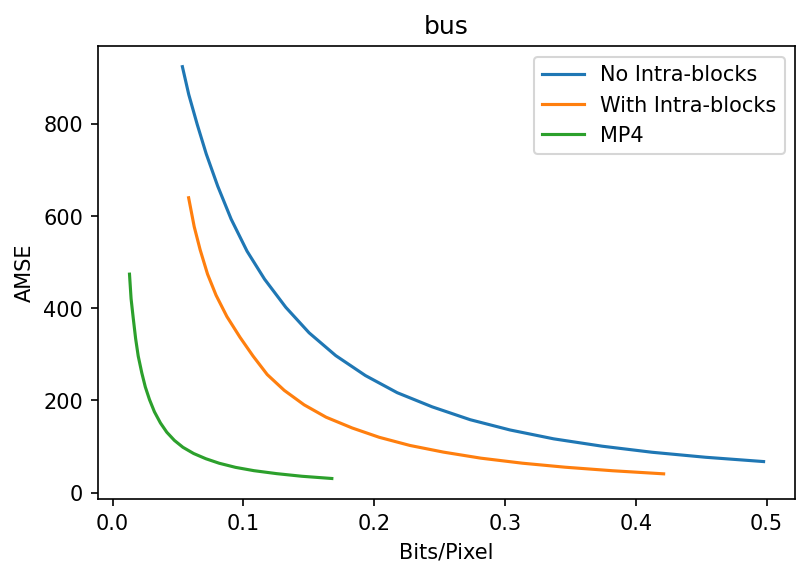

In [65]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

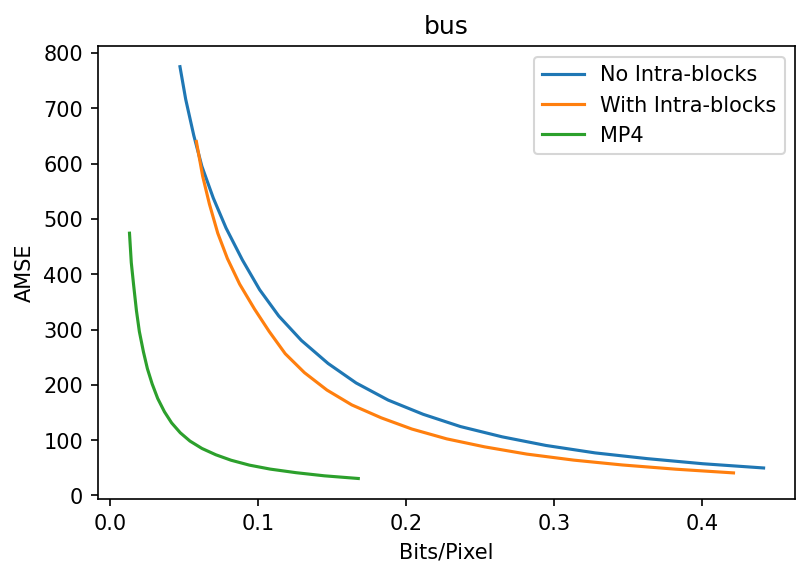

In [78]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()